<a href="https://colab.research.google.com/github/DavidPachis/dataScience/blob/main/parcial2/notebooks/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parcial 2**

## Importaciones 

In [67]:
!pip install wget
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
#librerías de manipulación
import wget
import pandas as pd
import numpy as np
import joblib
import xgboost
import shap


#librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
from sklearn import datasets

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test
from sklearn.model_selection import train_test_split

# para la creación y evaluación de modelos linear y polinomial
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils.vis_utils import plot_model

from sklearn.compose import make_column_selector as selector
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder


%matplotlib inline

## Primer y  Segundo punto

In [69]:
url = 'https://raw.githubusercontent.com/DavidPachis/dataScience/main/parcial2/data/diabetes_test.csv'
dia_df = pd.read_csv(url)

In [70]:
edad = 'https://raw.githubusercontent.com/DavidPachis/dataScience/main/parcial2/data/pto4.csv'
edad_df = pd.read_csv(edad)

In [71]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pregnancies           154 non-null    int64  
 1   glucose               154 non-null    int64  
 2   blood_pressure        154 non-null    int64  
 3   skin_thickness        154 non-null    int64  
 4   insulin               154 non-null    int64  
 5   bmi                   154 non-null    float64
 6   diabetes_pedigree_fn  154 non-null    float64
 7   age                   154 non-null    int64  
 8   diabetes              154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


In [72]:
dia_df.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_fn', 'age', 'diabetes'],
      dtype='object')

In [73]:
url2= 'https://github.com/DavidPachis/dataScience/raw/main/parcial2/data/diabetes-v1.0.joblib'
path= '/content/sample_data'
model = wget.download(url2, out=path)

In [74]:
model

'/content/sample_data/diabetes-v1.0 (1).joblib'

In [75]:
model_dia = joblib.load("/content/sample_data/diabetes-v1.0.joblib")

In [76]:
dia_x_df=dia_df.drop("diabetes", axis=1)
dia_y_df=dia_df['diabetes']

In [77]:
results=model_dia.predict(dia_x_df)

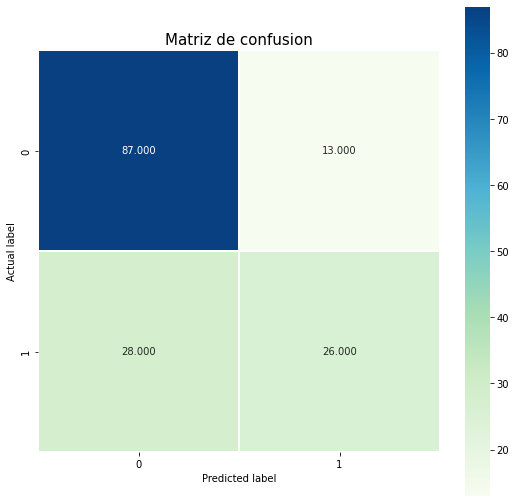

In [78]:
cm = metrics.confusion_matrix(dia_y_df, results)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,cmap='GnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Matriz de confusion', size = 15);
#plt.show();

## Tercer Punto (Glucosa)

  La Glucosa es el Feature más Influyente, como se evidencia en las graficas shap de abajo
  

Exact explainer: 155it [00:32,  3.05it/s]


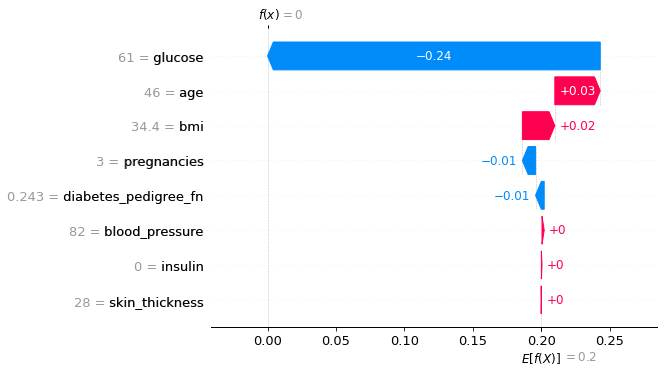

In [79]:
features = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_fn', 'age']
explainer = shap.Explainer(model_dia.predict, dia_x_df[features])
shap_values = explainer(dia_x_df[features])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

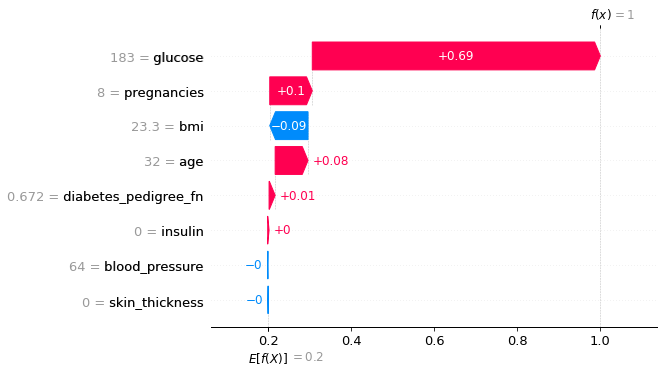

In [80]:
shap.plots.waterfall(shap_values[2])

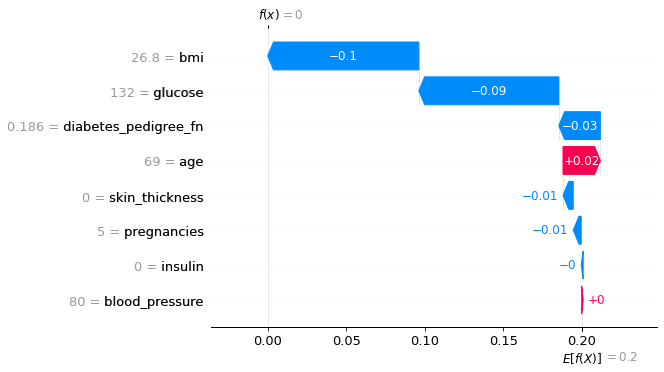

In [81]:
shap.plots.waterfall(shap_values[11])

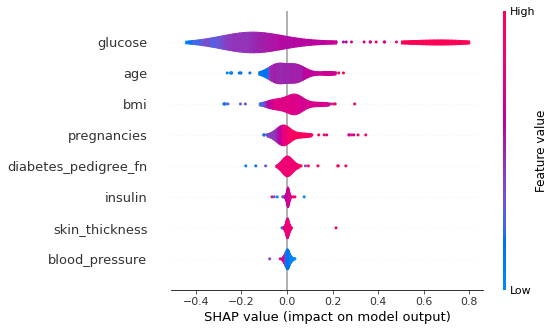

In [82]:
shap.summary_plot(shap_values, plot_type = 'violin')

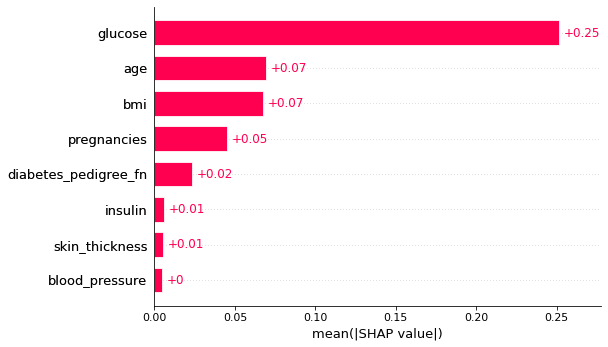

In [83]:
shap.plots.bar(shap_values)

## Punto 4 (28 años), se predijo un dataset variando solo la edad 


In [84]:
results_edad=model_dia.predict(edad_df.drop("diabetes", axis=1))

In [85]:
print(edad_df.iloc[[6]])

   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
6            2      175              88               0        0  22.9   

   diabetes_pedigree_fn  age  diabetes  
6                 0.326   28         0  


## Punto 5 

Se obtuvieron las probailidades de clases del modelo, y las comparé con las etiquetas reales de los enfermos, encontramos que 4 etiquetas se asignan mal, y que para la capacidad de 20 camas, el valor umbral deberia estar en **0.645882**, cuando corrí este umbral, más abajo se evidencia que tenemos en matriz de confusion 19 camas ocupadas, por lo cual decidí moverlo a **0.644438**

In [86]:
results_proba=model_dia.predict_proba(dia_x_df)[:,1]

In [87]:
results_proba

array([0.21444324, 0.28994415, 0.66960717, 0.18558482, 0.5274984 ,
       0.04779708, 0.36639098, 0.2762638 , 0.5438237 , 0.28793984,
       0.75835662, 0.34505509, 0.35780686, 0.70976673, 0.13866658,
       0.08148407, 0.13322184, 0.06904951, 0.65748353, 0.01108783,
       0.31832298, 0.48431537, 0.04915201, 0.12149811, 0.1133725 ,
       0.65677184, 0.1074598 , 0.15152522, 0.27356681, 0.52520962,
       0.09861493, 0.28414199, 0.0966139 , 0.1866842 , 0.32599402,
       0.12941875, 0.79041481, 0.34655589, 0.3153793 , 0.76877038,
       0.35966761, 0.56794586, 0.35822373, 0.63203837, 0.01178241,
       0.16869515, 0.76706286, 0.11361687, 0.28144179, 0.20190278,
       0.27797749, 0.63000568, 0.04232174, 0.0282417 , 0.07940051,
       0.36798866, 0.25047   , 0.04981943, 0.37481304, 0.78687216,
       0.32147744, 0.38960519, 0.56440913, 0.43890965, 0.36801473,
       0.75170851, 0.3669874 , 0.3279183 , 0.03786032, 0.03141544,
       0.03458564, 0.13054456, 0.1609901 , 0.76700997, 0.30459

In [88]:
dia_df['prob_1']= results_proba

In [89]:
dia_df.sort_values(by='prob_1',ascending=False).head(21)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age,diabetes,prob_1
87,10,179,70,0,0,35.1,0.200,37,0,0.862836
113,8,186,90,35,225,34.5,0.423,37,1,0.859807
36,17,163,72,41,114,40.9,0.817,47,1,0.790415
124,7,179,95,31,0,34.2,0.164,60,0,0.790404
59,5,168,64,0,0,32.9,0.135,41,1,0.786872
39,0,180,90,26,90,36.5,0.314,35,1,0.768770
46,6,195,70,0,0,30.9,0.328,31,1,0.767063
73,1,196,76,36,249,36.5,0.875,29,1,0.767010
10,3,170,64,37,225,34.5,0.356,30,1,0.758357
65,4,184,78,39,277,37.0,0.264,31,1,0.751709


## Matriz de Confusión

### Primer analisis de umbral para 20 camas

In [90]:
def nuevoUmbral(x):
  if x>0.645882:
    return(1)
  else:
    return(0)

In [91]:
dia_df['newUmbral']= dia_df['prob_1'].apply(nuevoUmbral)

In [92]:
dia_df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age,diabetes,prob_1,newUmbral
0,5,88,78,30,0,27.6,0.258,37,0,0.214443,0
1,3,61,82,28,0,34.4,0.243,46,0,0.289944,0
2,8,183,64,0,0,23.3,0.672,32,1,0.669607,1
3,6,80,80,36,0,39.8,0.177,28,0,0.185585,0
4,8,108,70,0,0,30.5,0.955,33,1,0.527498,0
...,...,...,...,...,...,...,...,...,...,...,...
149,8,109,76,39,114,27.9,0.640,31,1,0.452486,0
150,5,95,72,33,0,37.7,0.370,27,0,0.186930,0
151,5,0,80,32,0,41.0,0.346,37,1,0.291839,0
152,1,80,74,11,60,30.0,0.527,22,0,0.070110,0


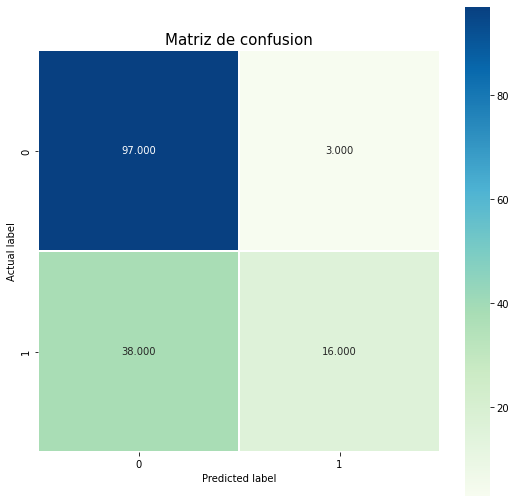

In [93]:
cm = metrics.confusion_matrix(dia_y_df, dia_df['newUmbral'])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,cmap='GnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Matriz de confusion', size = 15);
#plt.show();

### Segundo análisis de umbral para 20 camas

In [94]:
def nuevoUmbral2(x):
  if x>0.644438:
    return(1)
  else:
    return(0)

In [95]:
dia_df['newUmbral2']= dia_df['prob_1'].apply(nuevoUmbral2)

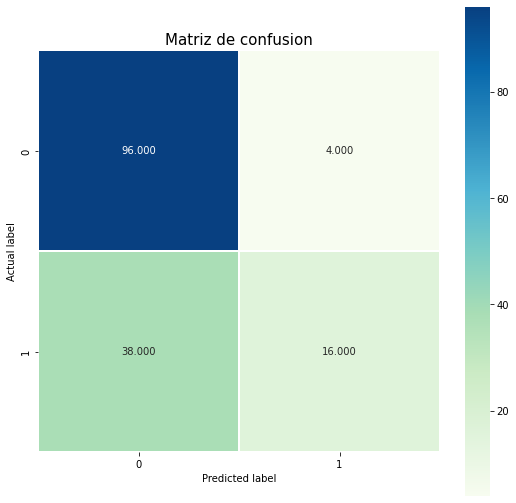

In [96]:
cm = metrics.confusion_matrix(dia_y_df, dia_df['newUmbral2'])
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,cmap='GnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Matriz de confusion', size = 15);
#plt.show();